# Importing necessary libraries

In [1]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load the dataset
df = pd.read_csv("C:/Users/HP/Downloads/redwines-main/redwines-main/winequality-red.csv")

# DATA EXPLORATION AND CLEANING

In [2]:

df.head() # Display first few rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()  # Display summary of data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe() # Display statistical summary of numerical columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# Check for missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# FEATURE SELECTION AND FEATURE ENGINEERING

In [6]:
# Handle categorical variables
df['quality'] = df['quality'].apply(lambda x: 'good' if x > 6 else 'bad')
df['quality'] = df['quality'].astype('category')

# Perform feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('quality', axis=1)
X = scaler.fit_transform(X)

# Split data into features (X) and target (y)
y = df['quality']

# Create a new feature 'total_acidity' as the sum of fixed acidity and volatile acidity
df1 = df.copy()
df1['total_acidity'] = df1['fixed acidity'] + df1['volatile acidity']
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad,8.56
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad,11.48
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,8.10


In [7]:
df1[df1['quality'] == 'good']

# the rows where the quality is 'good'


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,good,7.95
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,good,8.38
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,good,8.78
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,good,8.48
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,good,8.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,good,7.65
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,good,8.77
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,good,7.76
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,good,7.56


In [8]:
#FEATURE IMPORTANCE

X = pd.DataFrame(X)

rf_classifier = RandomForestClassifier()

# Fit the classifier to the data
rf_classifier.fit(X, y)

# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)
print(importance_df)

    Feature  Importance
10       10    0.156040
9         9    0.120612
1         1    0.112557
7         7    0.103897
2         2    0.090175
6         6    0.076966
0         0    0.073688
4         4    0.071146
3         3    0.068750
5         5    0.063457
8         8    0.062714


# DATA VISUALIZATION & EDA

### COUNT PLOT

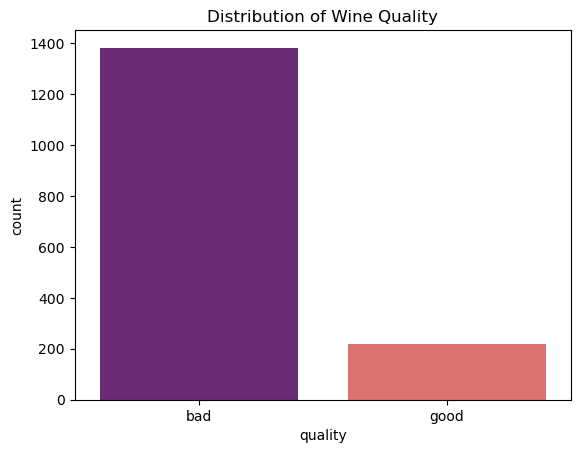

In [9]:
# Visualize the data
#this count plot shows how many low, medium and high wuality wines are present in dataset
sns.countplot(x='quality', palette='magma', data=df)
plt.title('Distribution of Wine Quality')
plt.show()


### CATPLOT

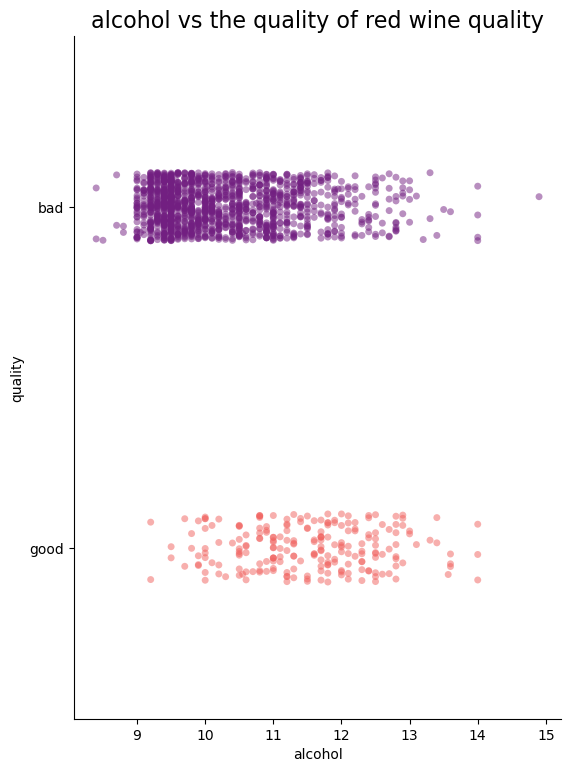

In [10]:
# catplot for alcohol vs quality
#to visualize the realtionship between alcohol and quality
#this kind of plot shows the three quartile values of the distribution along with extreme values.

def cat_plot(data,title):
    sns.catplot(x="alcohol", y="quality", palette="magma", alpha=0.5, data=data)
    plt.title('alcohol vs the quality of red wine '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

cat_plot(df ,"quality")

### HISTPLOT

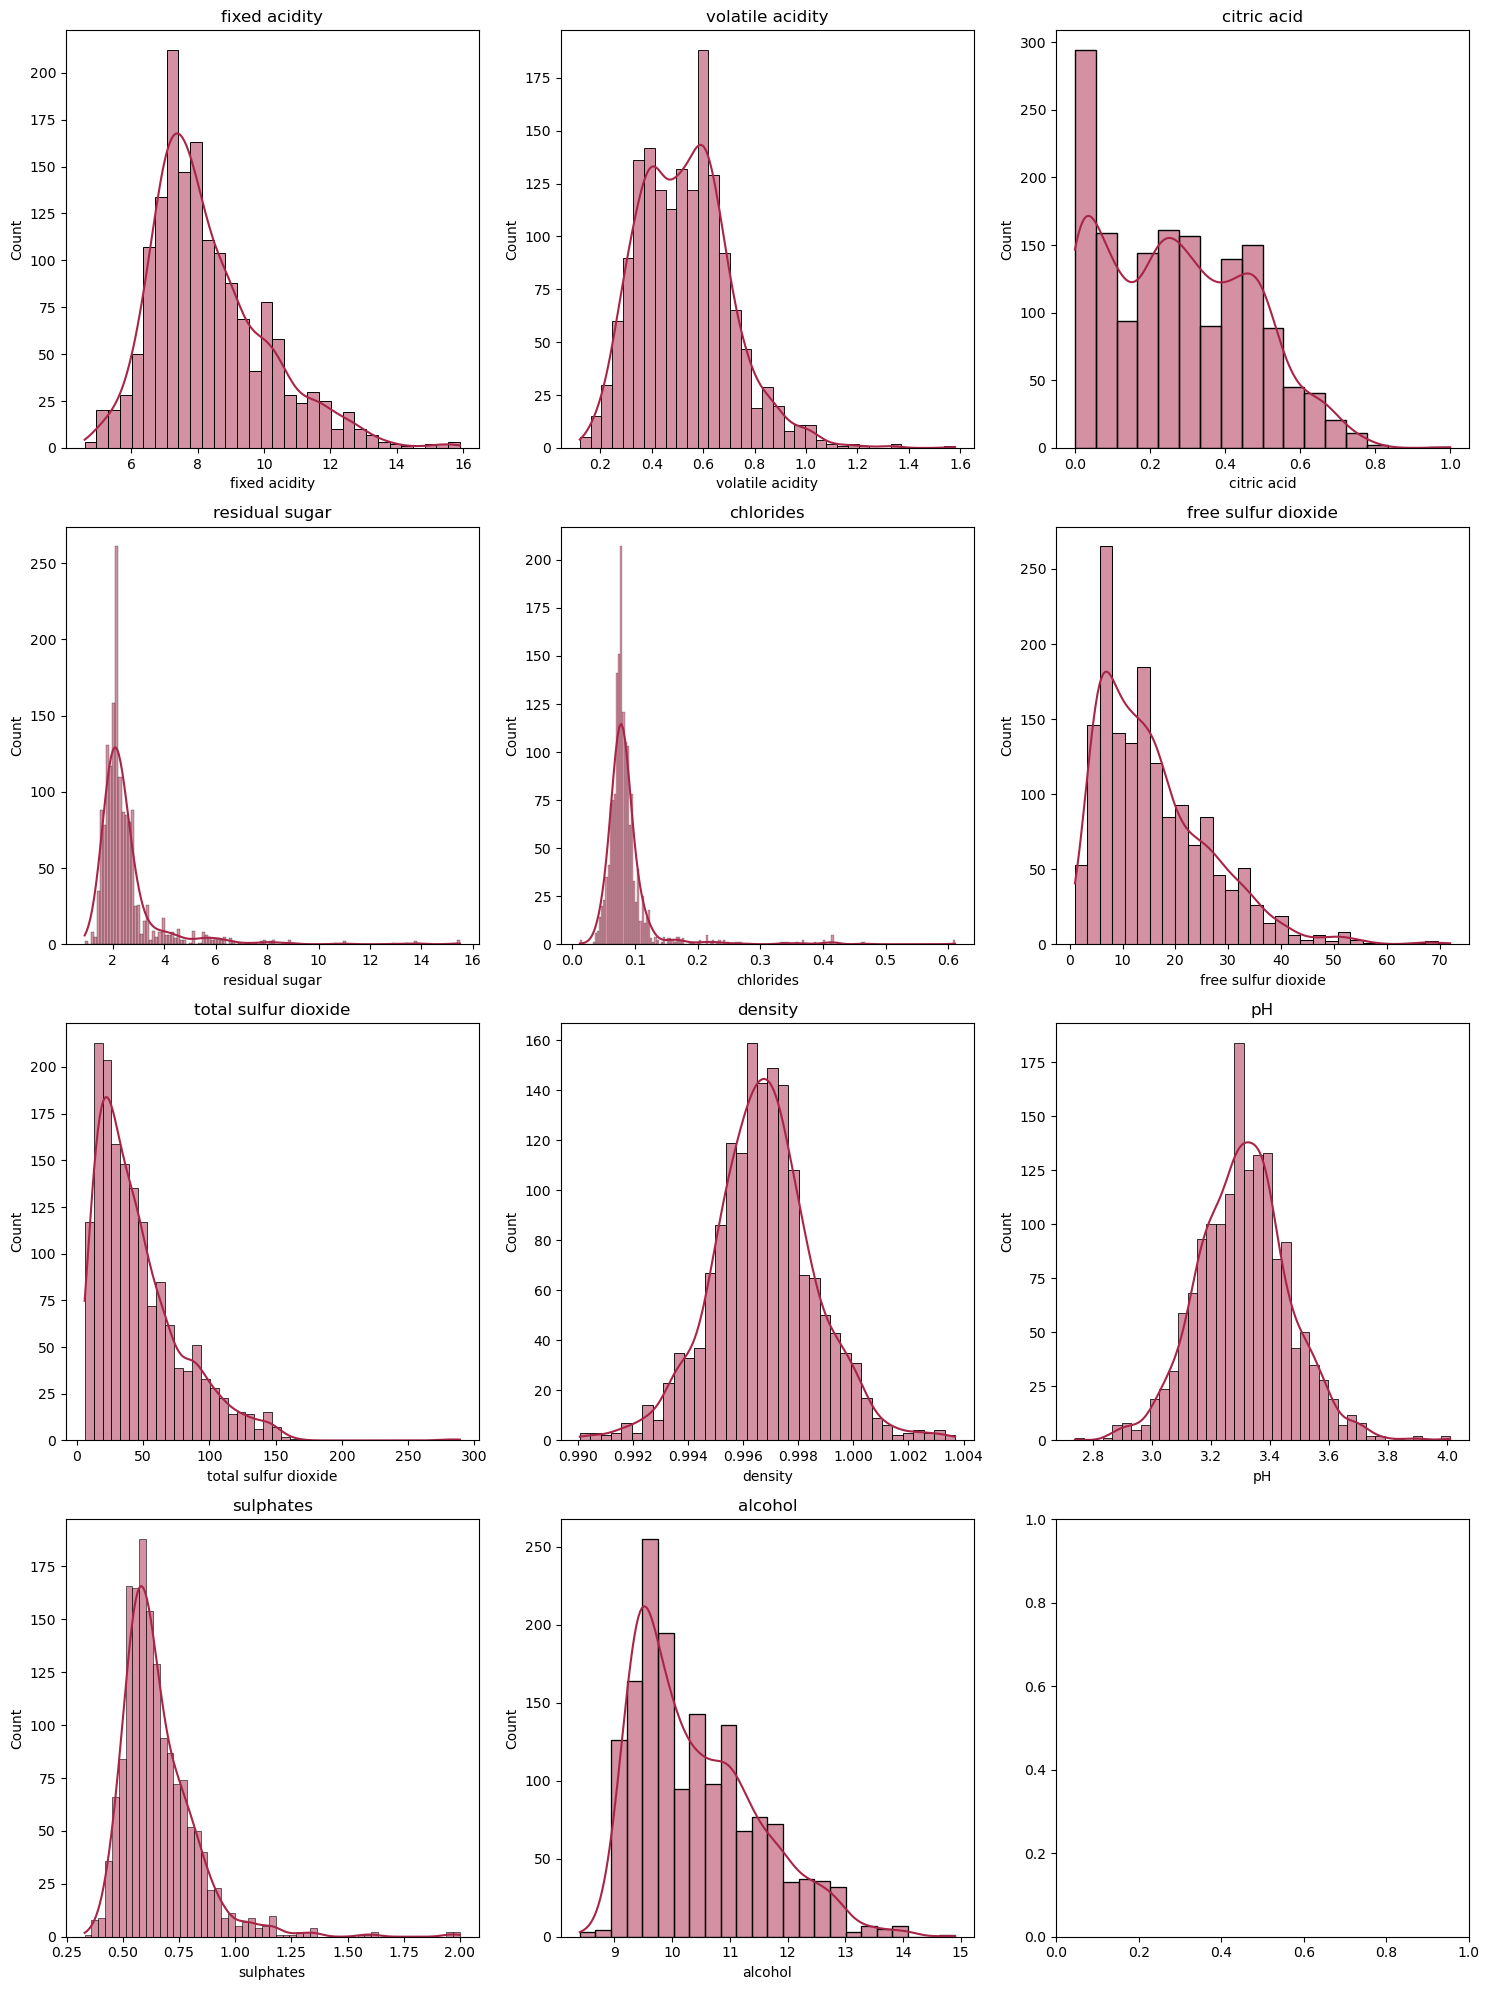

In [11]:
#creating subplots that represent the distribution of values of single numerical value

numerical_cols = df.select_dtypes(include='number').columns.tolist()

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

for col, ax in zip(numerical_cols, axs.flat): #iterating over numerical columns, and its respective subplot in flattened axes using zip()
    #col contains number of current numerical column and ax contains the current subplot
    sns.histplot(data=df, x=col, kde=True, ax=ax, color="#A82548")
    ax.set(title=col)
    if ax.get_subplotspec().is_last_row():
        ax.set(xlabel=col)

plt.tight_layout() #adjust the spacing between the subplots to eliminate overlapping
plt.show()

### BOXPLOT

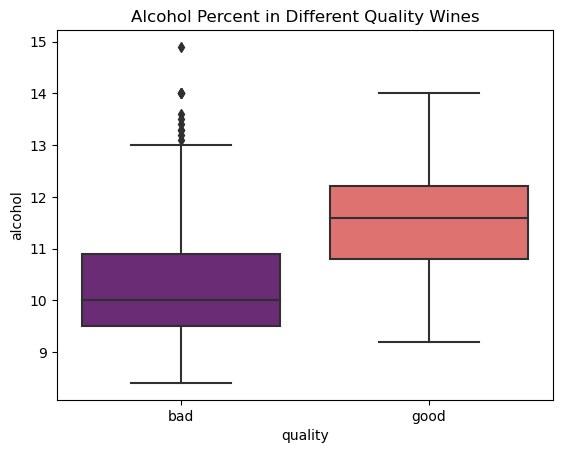

In [12]:
#This plot shows the distribution of alcohol percentage for each quality level of wines, 
#with boxes representing the interquartile range (IQR) and the median, 
#and whiskers representing the range of data points within 1.5 times the IQR. 

bp = sns.boxplot(x='quality',y='alcohol', palette = 'magma',data=df)
bp.set(title="Alcohol Percent in Different Quality Wines")
plt.show()

### SCATTERPLOT

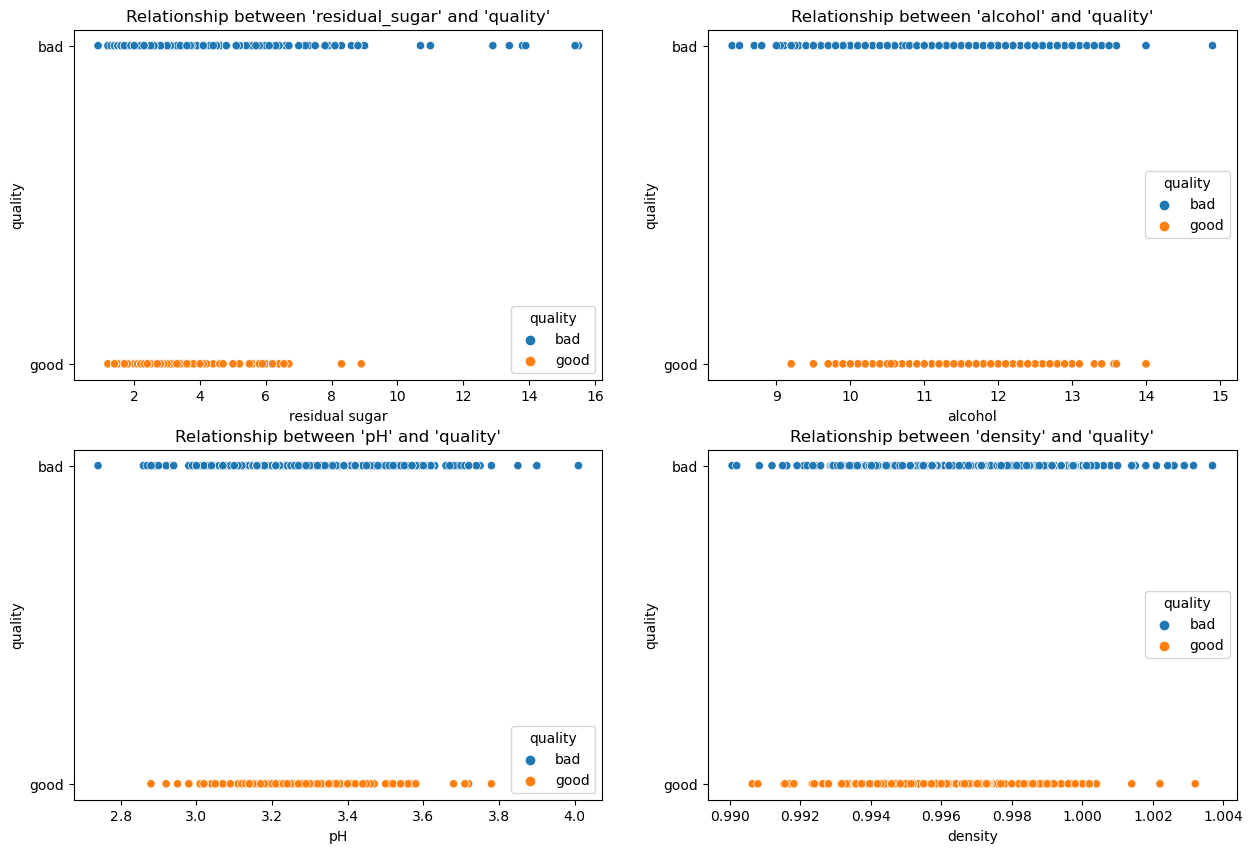

In [13]:
#to knoe the nature of relationship between features

fig, axes = plt.subplots(2, 2, figsize=(15, 10)) # subplots is used to make multiple plots in the same block
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "residual sugar",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'residual_sugar' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "alcohol",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'alcohol' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "pH",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'pH' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "density",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'density' and 'quality'");

### HEATMAP

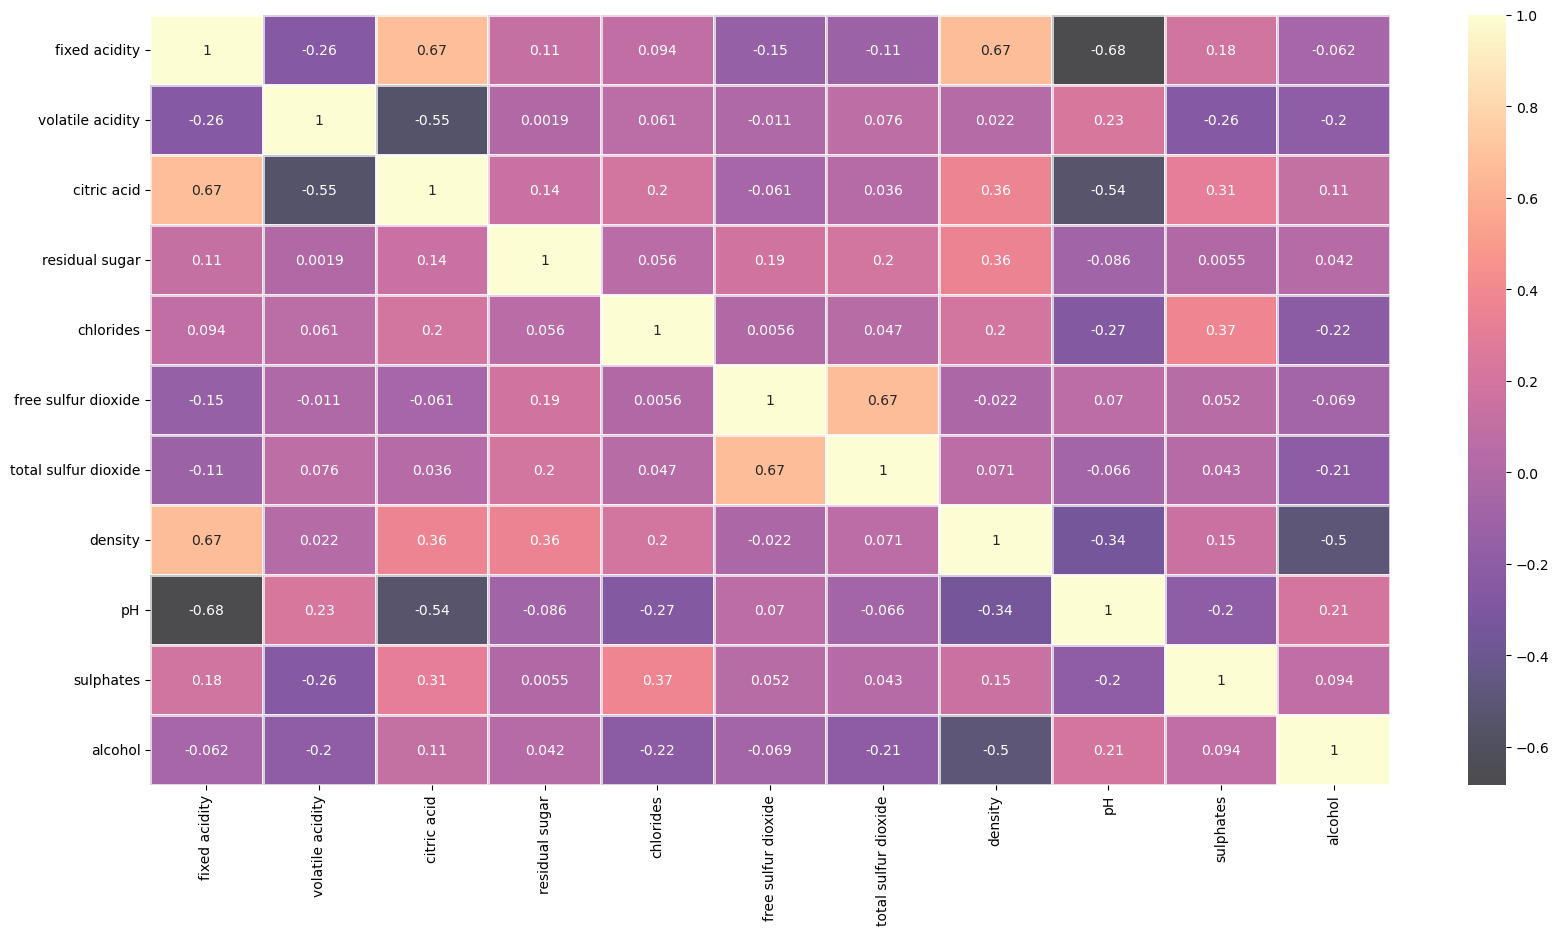

In [14]:
#correlation between the variables

plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths = 2, alpha=0.7, cmap = "magma");

# MODEL BUILDING

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# MODEL SELECTION & HYPERPARAMETER TUNING

### KNN

In [16]:
# Train and evaluate KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print('KNN Accuracy:', acc_knn)
print('Classification Report:', classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.878125
Classification Report:               precision    recall  f1-score   support

         bad       0.90      0.96      0.93       273
        good       0.63      0.40      0.49        47

    accuracy                           0.88       320
   macro avg       0.77      0.68      0.71       320
weighted avg       0.86      0.88      0.87       320



In [17]:
# HYPER PARAMETER TUNING

knn_params = {"n_neighbors": np.arange(2, 40),
             "weights": ["uniform", "distance"],
             "p": [1, 2]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [18]:
print("Best score for train set: " + str(knn_cv_model.best_score_))

print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]), #represents number of neighbors used in knn
     "\nbest weights: " + knn_cv_model.best_params_["weights"], #represents weight function used in knn
     "\nbest value of p: " + str(knn_cv_model.best_params_["p"])) #power parameter for the distance metric in knn

Best score for train set: 0.9061884842519685
best K value: 36 
best weights: distance 
best value of p: 1


In [19]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                weights = knn_cv_model.best_params_["weights"],
                                p = knn_cv_model.best_params_["p"],
                                )

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=36, p=1, weights='distance')

In [20]:
y_pred = knn_model.predict(X_test)
newacc_knn = accuracy_score(y_test, y_pred)
print('KNN accuracy after hypertuning', newacc_knn)

KNN accuracy after hypertuning 0.884375


### LOGISTIC REGRESSION

In [21]:
# Train and evaluate Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print('Logistic Regression Accuracy:', acc_lr)
print('Classification Report:', classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.865625
Classification Report:               precision    recall  f1-score   support

         bad       0.89      0.97      0.92       273
        good       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320



In [22]:
# HYPER PARAMETER TUNING

lr_params = {"C": [0.5, 0.75, 1, 1.5, 1.5, 2]}

lr_cv_model = GridSearchCV(lr, lr_params, cv = 10)
lr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 0.75, 1, 1.5, 1.5, 2]})

In [23]:
print("Best score for train set: " + str(lr_cv_model.best_score_))

print("best C value: " + str(lr_cv_model.best_params_["C"])) #represnts the inverse of regularization strength

Best score for train set: 0.887420029527559
best C value: 1.5


In [24]:
lr_model = LogisticRegression(C = 0.5)
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.5)

In [25]:
y_pred = lr_model.predict(X_test)
newacc_lr = accuracy_score(y_test, y_pred)
print('Logistic regression accuracy after hypertuning', newacc_lr)

Logistic regression accuracy after hypertuning 0.865625


### DECISION TREE

In [26]:
# Train and evaluate Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Accuracy:', acc_dt)
print('Classification Report:', classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8875
Classification Report:               precision    recall  f1-score   support

         bad       0.93      0.94      0.93       273
        good       0.62      0.60      0.61        47

    accuracy                           0.89       320
   macro avg       0.78      0.77      0.77       320
weighted avg       0.89      0.89      0.89       320



In [27]:
# HYPER PARAMETER TUNING

dt_params = {"criterion": ["gini", "entropy"],
             "max_depth": [3, 4, 5, 6, 7],
             "max_features": [4, 5, 6, 7],
             "min_samples_split": [2, 3, 4, 5, 6]}

dt_cv_model = GridSearchCV(dt, dt_params, cv = 10)
dt_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [28]:
print("Best score for train set: " + str(dt_cv_model.best_score_))

print("best criterion : " + dt_cv_model.best_params_["criterion"], #quality measure used between nodes
     "\nbest max_depth: " + str(dt_cv_model.best_params_["max_depth"]), #max depth of decision tree
     "\nbest max_features: " + str(dt_cv_model.best_params_["max_features"]), #no of features for looking for best split
     "\nbest min_samples_split: " + str(dt_cv_model.best_params_["min_samples_split"])) #min no of samples required to split a node

Best score for train set: 0.8944697342519685
best criterion : gini 
best max_depth: 4 
best max_features: 7 
best min_samples_split: 3


In [29]:
dt = DecisionTreeClassifier(criterion = dt_cv_model.best_params_["criterion"],
                                 max_depth = dt_cv_model.best_params_["max_depth"],
                                 max_features = dt_cv_model.best_params_["max_features"],
                                 min_samples_split = dt_cv_model.best_params_["min_samples_split"])
dt_model = dt.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
newacc_dt = accuracy_score(y_test, y_pred)
print('Decision tree accuracy after hypertuning', newacc_dt)

Decision tree accuracy after hypertuning 0.871875


### RANDOM FOREST

In [30]:
# Train and evaluate Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', acc_rf)
print('Classification Report:', classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9
Classification Report:               precision    recall  f1-score   support

         bad       0.92      0.97      0.94       273
        good       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



In [31]:
# HYPER PARAMETER TUNING

rf_params = {

'n_estimators': [50, 100, 200, 300],  # no of trees in the forest
    'max_depth': [None, 10, 20, 30],  # max depth of trees
    'min_samples_split': [2, 5, 10],  # min no of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # min no of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # no of features for looking for the best split
    'random_state': [42]  # seed for random number generation

}

rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1)
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [42]})

In [32]:
print("Best score for train set: " + str(rf_cv_model.best_score_))

print("\nbest n_estimators: " + str(rf_cv_model.best_params_["n_estimators"]), 
     "\nbest max_depth: " + str(rf_cv_model.best_params_["max_depth"]), 
     "\nbest min_samples_split: " + str(rf_cv_model.best_params_["min_samples_split"])) 

Best score for train set: 0.9147883858267717

best n_estimators: 50 
best max_depth: None 
best min_samples_split: 2


In [33]:
rf = RandomForestClassifier(
                                 max_depth = rf_cv_model.best_params_["max_depth"],
                                 n_estimators = rf_cv_model.best_params_["n_estimators"],
                                 min_samples_split = rf_cv_model.best_params_["min_samples_split"],
                                #  min_samples_leaf = rf_cv_model.best_params_["min_samples_leaf"],
                                #  max_features = rf_cv_model.best_params_["max_features"],
                                 )

rf_model = rf.fit(X_train, y_train)

In [34]:
y_pred = rf_model.predict(X_test)
newacc_rf = accuracy_score(y_test, y_pred)
print('Random forest accuracy after hypertuning', newacc_rf)

Random forest accuracy after hypertuning 0.903125


# ACCURACIES OF ALL MODELS

In [35]:
y_pred = knn_model.predict(X_test)
newacc_knn = accuracy_score(y_test, y_pred)
print('KNN accuracy after hypertuning', newacc_knn)

y_pred = lr_model.predict(X_test)
newacc_lr = accuracy_score(y_test, y_pred)
print('Logistic regression accuracy after hypertuning', newacc_lr)

y_pred = dt_model.predict(X_test)
newacc_dt = accuracy_score(y_test, y_pred)
print('Decision tree accuracy after hypertuning', newacc_dt)

y_pred = rf_model.predict(X_test)
newacc_rf = accuracy_score(y_test, y_pred)
print('Random forest accuracy after hypertuning', newacc_rf)



KNN accuracy after hypertuning 0.884375
Logistic regression accuracy after hypertuning 0.865625
Decision tree accuracy after hypertuning 0.871875
Random forest accuracy after hypertuning 0.903125


# COMPARING ACCURACIES

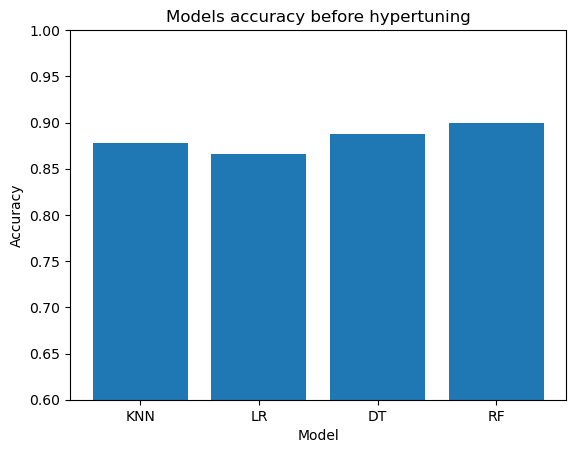

Best Model: RF


In [36]:
# Compare model performance
models = ['KNN', 'LR', 'DT', 'RF']
accuracies = [acc_knn, acc_lr, acc_dt, acc_rf]

color = "#800020"

plt.bar(models, accuracies)
plt.title('Models accuracy before hypertuning')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.0)
plt.show()

# Select the best-performing model
best_model_idx = accuracies.index(max(accuracies))
best_model = models[best_model_idx]
print('Best Model:', best_model)

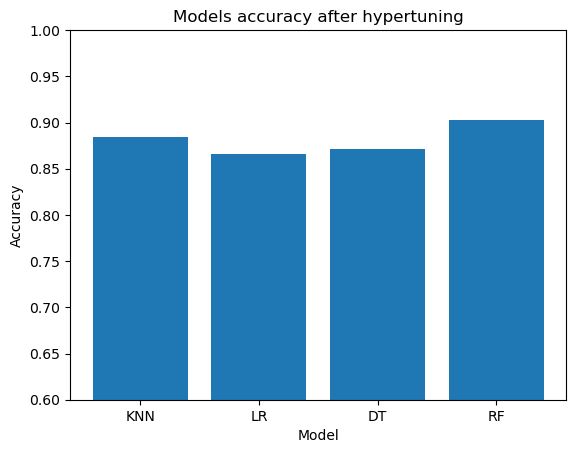

Best Model: RF


In [37]:
# Compare model performance after hypertuning
models = ['KNN', 'LR', 'DT', 'RF']
accuracies = [newacc_knn, newacc_lr, newacc_dt, newacc_rf]

plt.bar(models, accuracies)
plt.title('Models accuracy after hypertuning')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.0)
# plt.color("#A82548")
plt.show()

# Select the best-performing model
best_model_idx = accuracies.index(max(accuracies))
best_model = models[best_model_idx]
print('Best Model:', best_model)


# DEPLOYMENT

In [45]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Assuming you have features (X) and labels (y) loaded from your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Save the trained model using joblib
joblib.dump(clf, 'model.joblib')


['model.joblib']

In [47]:
model = joblib.load('model.joblib')
print(type(model))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [49]:
joblib.dump(model, 'model.joblib')

['model.joblib']

In [48]:
model = joblib.load('model.joblib')

In [43]:
if hasattr(model, 'predict') and not df.empty:
    try:
        prediction = model.predict(df)[0]
    except Exception as e:
        prediction = f'Error predicting: {str(e)}'
else:
    prediction = 'Model does not have a predict method or DataFrame is empty'
